<a href="https://colab.research.google.com/github/HenaRaina/MLAILAB/blob/master/Project2_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 39.3MB/s 
     |████████████████████████████████| 3.8MB 57.0MB/s 
     |████████████████████████████████| 450kB 49.9MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:

import os
import time

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.activations import relu
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/SVHN_single_grey.h5"

'/content/drive/My Drive/SVHN_single_grey.h5'


In [5]:
with h5py.File("/content/drive/My Drive/SVHN_single_grey.h5", 'r') as hdf:
  ls = list(hdf.keys())
  print("list of datasets", ls)
  XTrain_data = np.array(hdf["X_train"])
  XTest_data = np.array(hdf["X_test"])
  XVal_data = np.array(hdf["X_val"])
  YTrain_data = np.array(hdf["y_train"])
  YTest_data = np.array(hdf["y_test"])
  YVAL_data = np.array(hdf["y_val"])

  


list of datasets ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [6]:
print(XTrain_data.shape,XTest_data.shape, XVal_data.shape,YTrain_data.shape,YTest_data.shape,YVAL_data.shape)


(42000, 32, 32) (18000, 32, 32) (60000, 32, 32) (42000,) (18000,) (60000,)


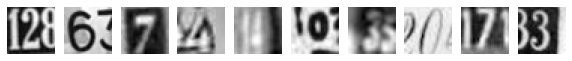

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


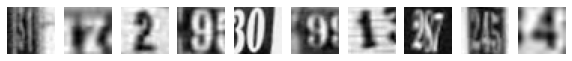

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


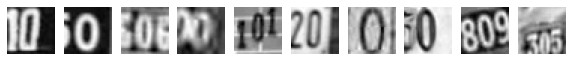

label for each of the above image: [0 0 0 0 0 0 0 0 0 0]


In [7]:
## Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
#Data fetching and understand the train/val/test splits 

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(XTrain_data[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (YTrain_data[0:10]))


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(XTest_data[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (YTest_data[0:10]))

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(XVal_data[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (YVAL_data[0:10]))

In [8]:
X_train_features = XTrain_data.reshape(42000, 1024)
print (X_train_features.shape)
X_test_features = XTest_data.reshape(18000, 1024)
print (X_test_features.shape)
X_Val_features = XVal_data.reshape(60000, 1024)
print (X_Val_features.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


In [0]:
# # normalize inputs from 0-255 to 0-1
X_train_features = X_train_features / 255.0
X_test_features = X_test_features / 255.0
X_Val_features = X_Val_features / 255.0


In [10]:
X_train_features.shape,X_test_features.shape,X_Val_features.shape

((42000, 1024), (18000, 1024), (60000, 1024))

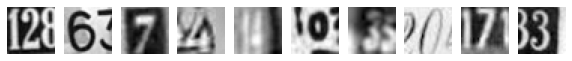

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train_features[i].reshape(32,32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (YTrain_data[0:10]))

In [0]:
import tensorflow as tf
num_classes = 10
YTrain_data = tf.keras.utils.to_categorical(YTrain_data, num_classes)   # Converting the target into categorical which is stored as numeric
YTest_data = tf.keras.utils.to_categorical(YTest_data, num_classes) 
YVAL_data = tf.keras.utils.to_categorical(YVAL_data, num_classes)


In [20]:
#Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) 

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization


model = Sequential()

wt_init = tf.keras.initializers.he_normal(seed=None)
model.add(Dense(1024, input_shape=(1024,),activation='relu' , kernel_initializer = wt_init)) 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # 20% drop out for the first hidden layer
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  
model.add(Dense(10, activation='softmax'))            
        
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_4 (None, 1024) ==> (None, 1024)
batch_normalization_3 (None, 1024) ==> (None, 1024)
dropout_3 (None, 1024) ==> (None, 1024)
dense_5 (None, 1024) ==> (None, 1024)
batch_normalization_4 (None, 1024) ==> (None, 1024)
dropout_4 (None, 1024) ==> (None, 1024)
dense_6 (None, 1024) ==> (None, 1024)
batch_normalization_5 (None, 1024) ==> (None, 1024)
dropout_5 (None, 1024) ==> (None, 1024)
dense_7 (None, 1024) ==> (None, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)        

In [21]:

batch_size = 256
epochs = 100
#sgd = optimizers.sgd(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_features, YTrain_data, batch_size=batch_size, epochs=epochs,validation_split=.1, verbose=True)



Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 17s 448us/sample - loss: 2.5953 - accuracy: 0.2046 - val_loss: 2.0611 - val_accuracy: 0.3388
Epoch 2/100
37800/37800 [==============================] - 15s 403us/sample - loss: 1.9467 - accuracy: 0.3690 - val_loss: 1.5354 - val_accuracy: 0.5524
Epoch 3/100
37800/37800 [==============================] - 15s 404us/sample - loss: 1.6109 - accuracy: 0.4737 - val_loss: 1.2132 - val_accuracy: 0.6269
Epoch 4/100
37800/37800 [==============================] - 15s 401us/sample - loss: 1.4171 - accuracy: 0.5401 - val_loss: 1.0540 - val_accuracy: 0.6729
Epoch 5/100
37800/37800 [==============================] - 15s 405us/sample - loss: 1.2975 - accuracy: 0.5810 - val_loss: 0.9875 - val_accuracy: 0.6933
Epoch 6/100
37800/37800 [==============================] - 15s 407us/sample - loss: 1.2080 - accuracy: 0.6101 - val_loss: 0.9417 - val_accuracy: 0.7048
Epoch 7/100
37800/37800 [==============

KeyError: ignored

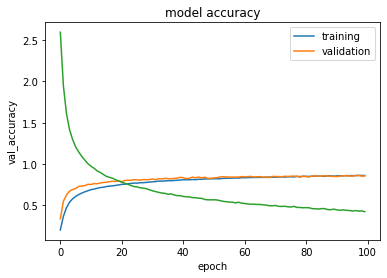

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

[0.33880952, 0.552381, 0.6269048, 0.67285717, 0.6933333, 0.7047619, 0.73071426, 0.73452383, 0.7409524, 0.7557143, 0.75404763, 0.7647619, 0.76309526, 0.77190477, 0.77809525, 0.7814286, 0.78880954, 0.7923809, 0.7911905, 0.79952383, 0.78690475, 0.8030952, 0.805, 0.8047619, 0.8130952, 0.81, 0.80642855, 0.8138095, 0.8119048, 0.8145238, 0.8202381, 0.81095237, 0.8247619, 0.82095236, 0.8283333, 0.8259524, 0.8219048, 0.82738096, 0.83190477, 0.8402381, 0.83619046, 0.825, 0.8295238, 0.8428571, 0.8352381, 0.8435714, 0.8352381, 0.84119046, 0.82785714, 0.8297619, 0.83309525, 0.8364286, 0.8457143, 0.84833336, 0.8447619, 0.8442857, 0.8428571, 0.8433333, 0.8440476, 0.8492857, 0.84690475, 0.8492857, 0.85190475, 0.8440476, 0.84690475, 0.8490476, 0.8421429, 0.8464286, 0.8378571, 0.8509524, 0.8504762, 0.85, 0.84738094, 0.8535714, 0.85071427, 0.85452384, 0.855, 0.85452384, 0.84261906, 0.85642856, 0.8478571, 0.8457143, 0.85880953, 0.85380954, 0.855, 0.8554762, 0.8604762, 0.8554762, 0.85238093, 0.85190475, 0.

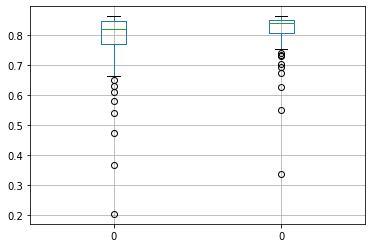

In [25]:
import pandas as pd

print(history.history['val_accuracy'])
print(history.history['accuracy'])
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns

loss, acc = model.evaluate(X_test_features, YTest_data, verbose=True)
print('Test Accuracy: %.3f' % acc)





18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
y_pred = model.predict(X_test_features)

In [29]:
print('label for each of the above image: %s' % (y_pred[0:10]))

label for each of the above image: [[4.4907016e-01 1.6279238e-01 7.7734560e-02 3.2181833e-03 5.1885825e-02
  2.6583698e-02 2.5527116e-02 1.3425476e-02 7.8115173e-02 1.1164747e-01]
 [1.0797738e-06 8.8599272e-04 2.8691387e-01 6.1585532e-05 3.8625046e-07
  1.5032730e-05 1.6299879e-05 7.1189314e-01 1.0597099e-05 2.0196664e-04]
 [8.0170071e-07 1.5804198e-05 9.9983311e-01 7.8467834e-05 2.2210036e-06
  3.1232759e-08 4.5680114e-08 4.9922972e-05 1.7730577e-05 1.9194970e-06]
 [4.4917347e-06 4.1227675e-08 4.9924495e-07 1.8577975e-09 1.8926633e-08
  6.2101668e-10 1.0224431e-09 3.0808767e-10 7.2085419e-07 9.9999428e-01]
 [9.9910778e-01 2.1723574e-06 1.6767821e-07 9.9247508e-09 9.8835415e-07
  2.8633647e-07 6.8043452e-04 2.2047413e-06 1.4752637e-04 5.8523659e-05]
 [1.1648241e-03 2.9355468e-04 1.4693124e-05 3.8969160e-06 1.2233789e-05
  3.6529075e-06 6.0164839e-06 6.5999993e-06 3.5513156e-05 9.9845910e-01]
 [1.5363326e-04 6.6885525e-01 1.3920990e-01 3.6537137e-02 3.8865983e-02
  4.3410257e-02 3.16453

In [31]:
from sklearn.metrics import classification_report
import numpy as np

YTest_data = np.argmax(YTest_data, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test_features)
print(classification_report(YTest_data, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1814
           1       0.82      0.88      0.85      1828
           2       0.83      0.89      0.86      1803
           3       0.79      0.82      0.81      1719
           4       0.89      0.88      0.89      1812
           5       0.80      0.87      0.83      1768
           6       0.91      0.80      0.85      1832
           7       0.89      0.89      0.89      1808
           8       0.86      0.78      0.82      1812
           9       0.87      0.83      0.85      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000

